# Питон и машинное обучение

## Модуль 2. Предварительная обработка данных

- Визуализация данных
- Нормализация и шкалирование данных
- Поиск статистических выбросов (аутлайеров) борьба с ними
- Работа с текстовыми и категориальными признаками: one-hot encoding



### Работа с признаками с помощью объектов Pandas

Здесь мы рассмотрим базовые операции по предобработке данных в контексте отдельных признаков датасета.

Предварительный анализ признаков лучше делать на полном датасете, который включает в себя и определяющую, и результирующую части.

Более подробно про модификацию признаков будет рассказано по ходу курса.

In [13]:
# снова загрузим "ирисы"
iris_raw = datasets.load_iris()
iris = pd.DataFrame(iris_raw.data, columns=iris_raw.feature_names)
iris['y'] = iris_raw.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Переименование признаков:

In [14]:
iris.columns = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'y']
iris

,sepal_l,sepal_w,petal_l,petal_w,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Посмотреть статистические характеристики для всех числовых признаков можно при помощи функции ```describe()```:

In [15]:
iris.describe()

,sepal_l,sepal_w,petal_l,petal_w,y
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Получить данные по конкретному признаку можно, обратившись к нему как к элементу словаря, это даст объект ```pd.Series``` с соответствующей колонкой из загруженной таблицы:

In [16]:
iris['sepal_l'] 

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_l, Length: 150, dtype: float64

In [17]:
iris.sepal_l # такой способ обращения тоже поддерживается

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_l, Length: 150, dtype: float64

Чтобы обратиться к каким-либо важным, на ваш взгляд, характеристикам датасета, можно использовать булевы маски.

Например, вот так можно посмотреть все ирисы, у которых ```sepal_l``` больше медианного значения:

In [18]:
iris[ iris.sepal_l > iris.sepal_l.median() ]

,sepal_l,sepal_w,petal_l,petal_w,y
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
54,6.5,2.8,4.6,1.5,1
56,6.3,3.3,4.7,1.6,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Для подсчета уникальных значений категориальных признаков удобно пользоваться функцией ```value_counts()```. 

Например, вот так можно узнать распределение классов для нашего среза из предыдущей клетки:

In [19]:
iris[ iris.sepal_l > iris.sepal_l.median() ].y.value_counts()

y
2    44
1    26
Name: count, dtype: int64

#### Визуализация признаков

Матрица диаграмм рассеяния, по диагонали - гистограммы распределения значений по каждому признаку.

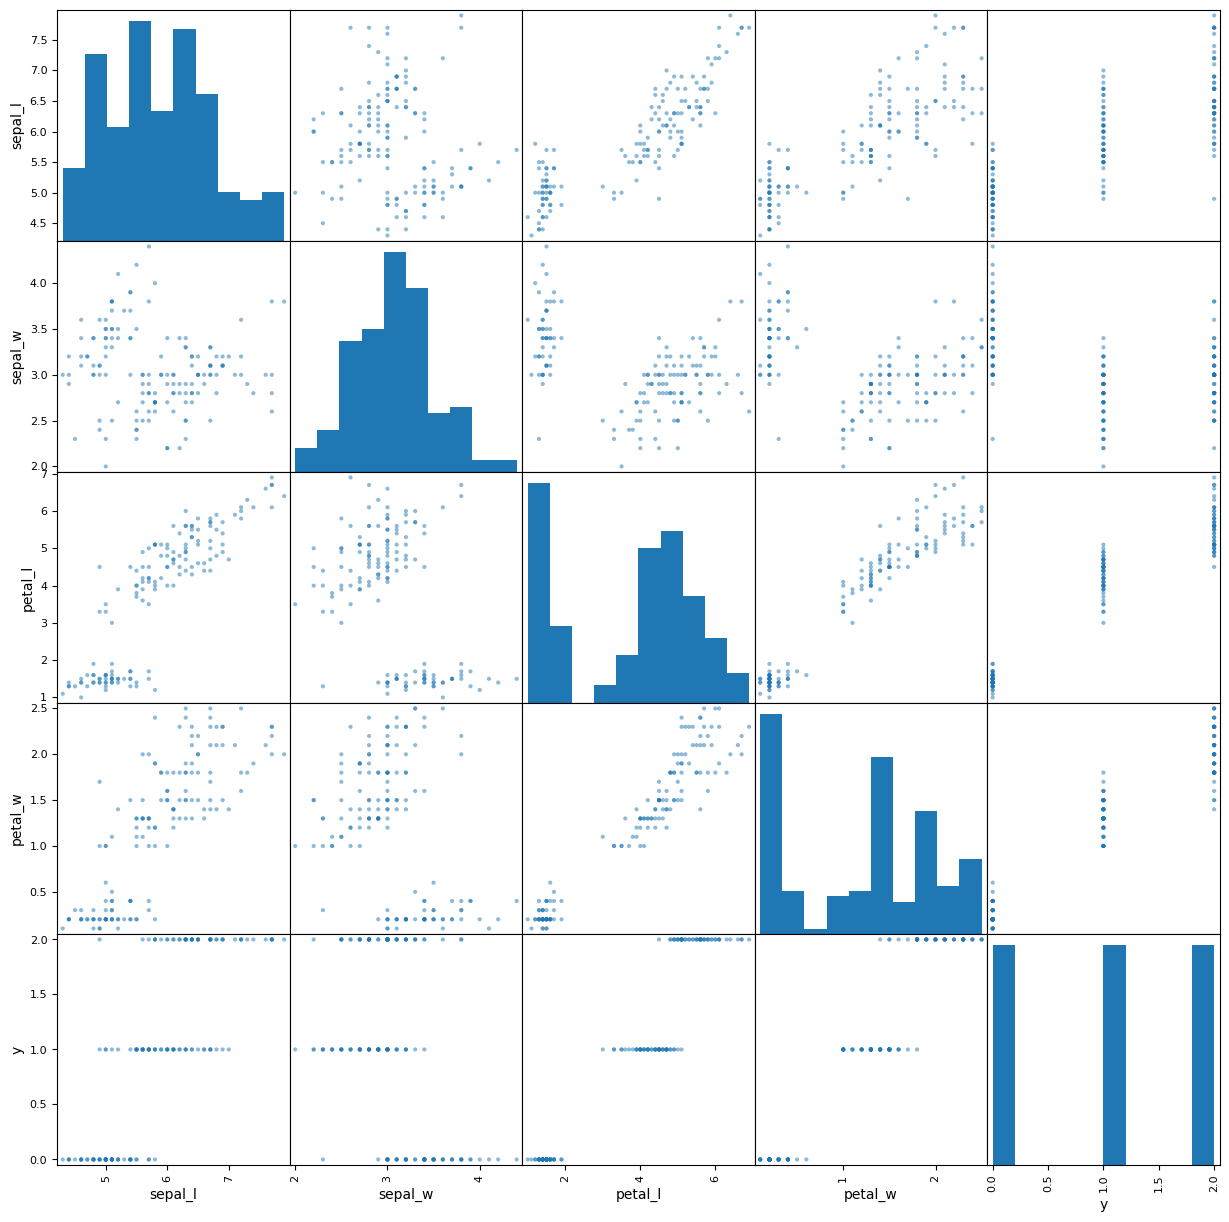

In [20]:
_ = pd.plotting.scatter_matrix(iris, 
                  figsize=(15, 15))

In [21]:
!conda install -y seaborn

Channels:
 - defaults
 - conda-forge
 - pytorch
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



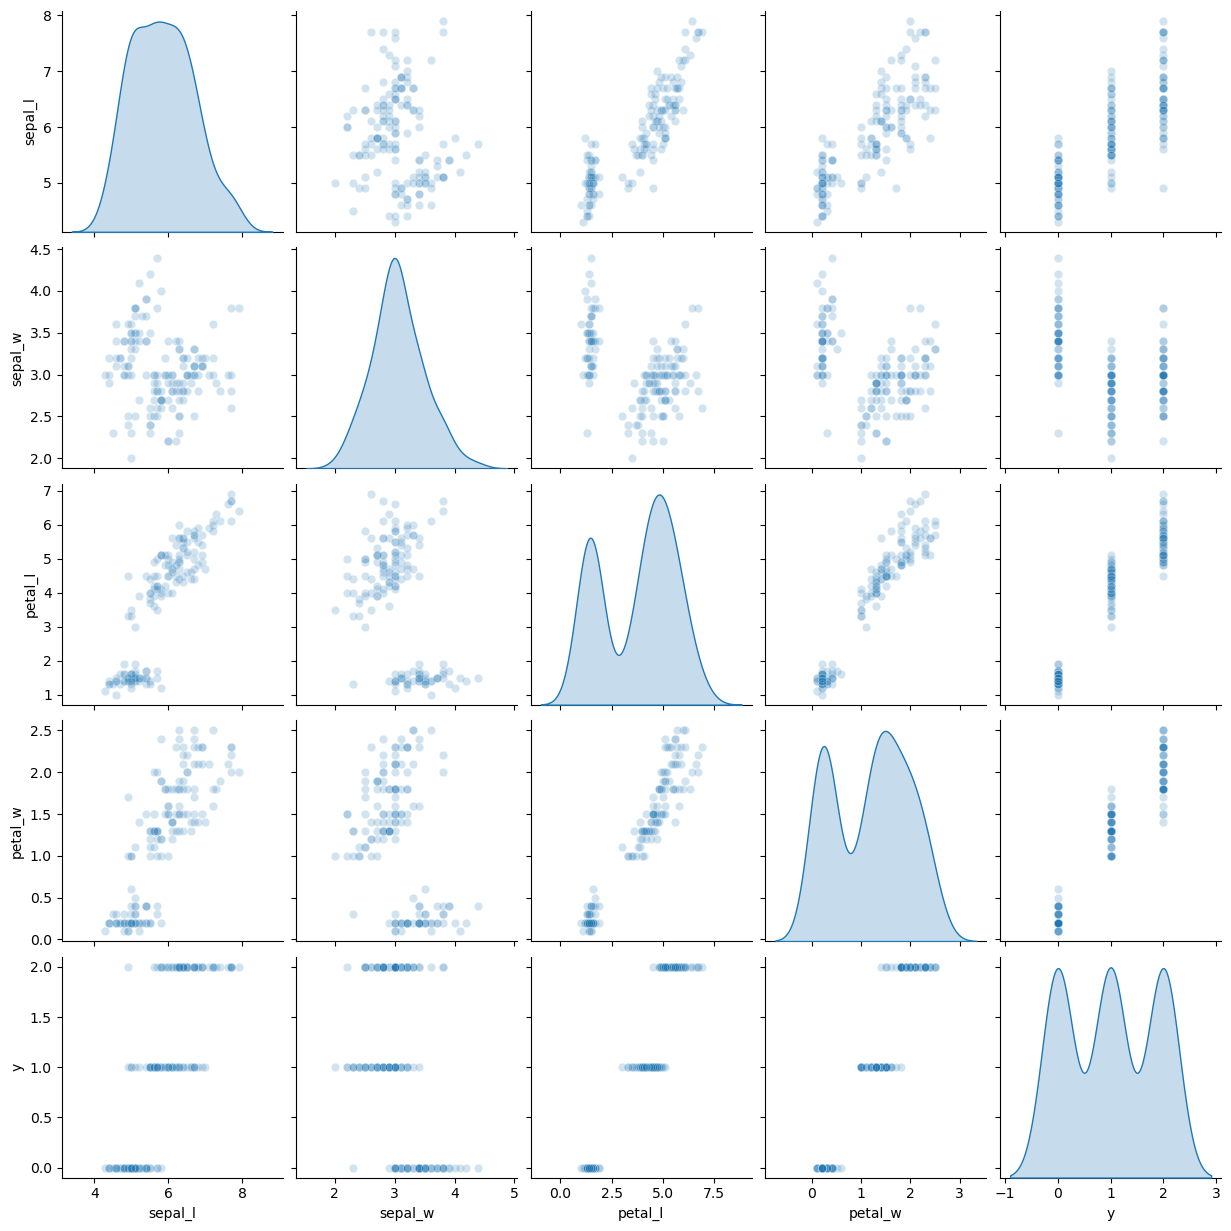

In [22]:
import seaborn as sns

_ = sns.pairplot(iris,
             diag_kind='kde', plot_kws={'alpha': 0.2})

Корелляционная матрица:

,sepal_l,sepal_w,petal_l,petal_w,y
sepal_l,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_w,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_l,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_w,0.817941,-0.366126,0.962865,1.000000,0.956547
y,0.782561,-0.426658,0.949035,0.956547,1.000000


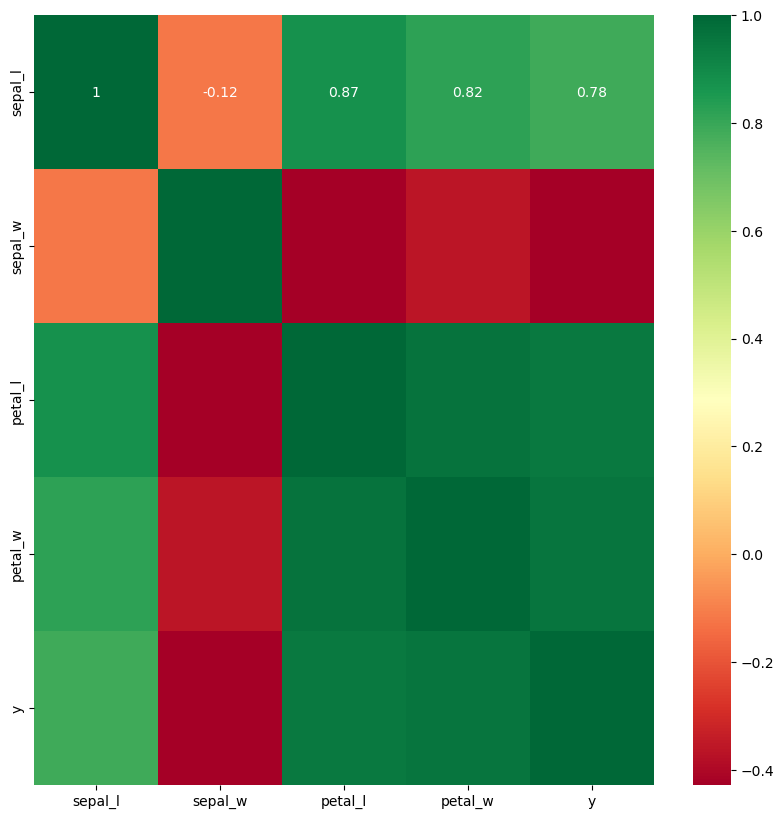

In [23]:
plt.figure(figsize=(10,10))

_ = sns.heatmap(iris.corr(), annot=True, cmap="RdYlGn")
iris.corr()

Визуализация отдельных признаков:

<Axes: >

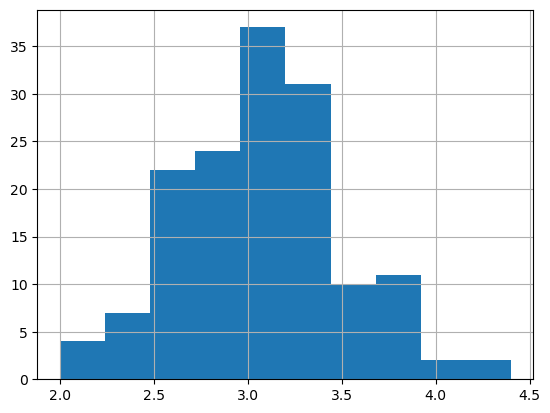

In [24]:
iris['sepal_w'].hist()

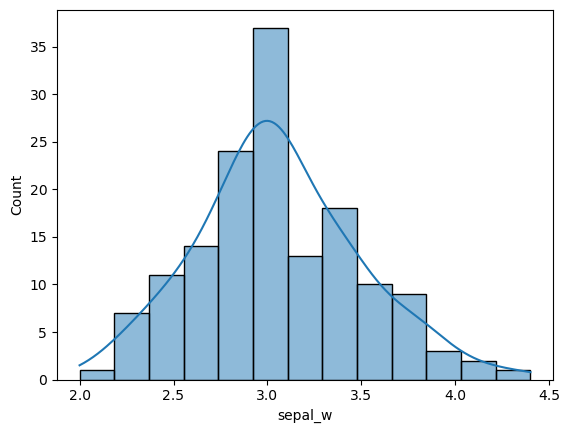

In [25]:
_ = sns.histplot(iris['sepal_w'], kde=True)

#### Преобразования признаков

1. Min-max шкалирование:


$\tilde{x}_i = \frac{x_i - x_{min}}{x_{max} - x_{min}}$

In [30]:
from sklearn.preprocessing import MinMaxScaler

iris_minmax = pd.DataFrame( MinMaxScaler().fit_transform(iris.iloc[ :, :-1 ]), columns = iris.columns[:-1] )
iris_minmax.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


2. Стандартное шкалирование: нормализация с мат. ожиданием в 0 и дисперсией 1:

$\tilde{x}_i = \frac{x_i - \mu}{\sigma}$

In [34]:
from sklearn.preprocessing import StandardScaler

iris_std = pd.DataFrame( StandardScaler().fit_transform(iris.iloc[ :, :-1 ]), columns = iris.columns[:-1] )
iris_std.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


3. L2-нормализация: каждый вектор делится на свой модуль:

$\tilde{x} = \frac{x}{||x||}$

In [35]:
from sklearn.preprocessing import normalize

iris_norm = pd.DataFrame( normalize(iris.iloc[ :, :-1 ]), columns = iris.columns[:-1] )
iris_norm.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,0.751400,0.405174,0.454784,0.141071
std,0.044368,0.105624,0.159986,0.077977
min,0.653877,0.238392,0.167836,0.014727
25%,0.715261,0.326738,0.250925,0.048734
50%,0.754883,0.354371,0.536367,0.164148
75%,0.786912,0.527627,0.580025,0.197532
max,0.860939,0.607125,0.636981,0.280419


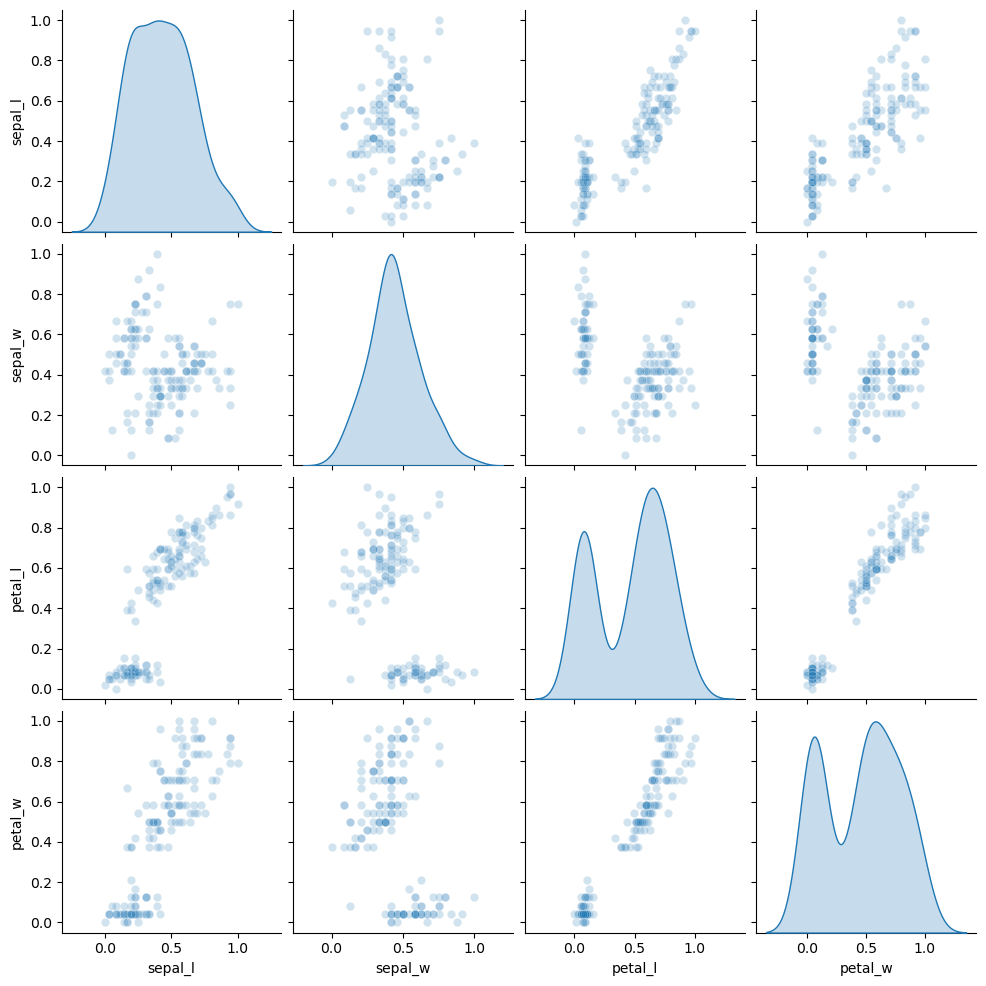

In [40]:
_ = sns.pairplot(iris_minmax,
             diag_kind='kde', plot_kws={'alpha': 0.2})

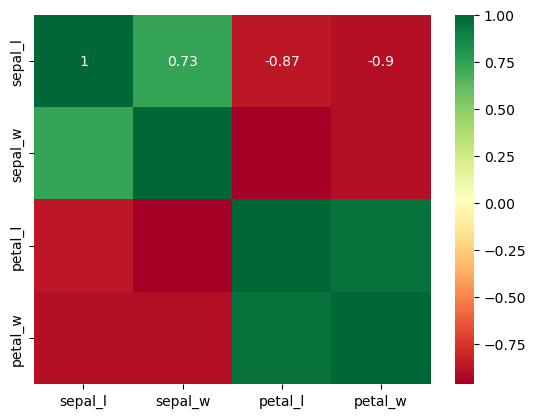

In [44]:
_ = sns.heatmap(iris_norm.corr(), annot=True, cmap="RdYlGn")

Подробнее о различных способах нормализации можно прочитать в [официальной документации ```scikit-learn```](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html).

In [ ]:
biz_f = open('data/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])
biz_f.close()

Как получить ```X```, ```y```?

1. использовать ```iloc``` и индексы, если результирующий признак в начале или в конце:

In [24]:
X = bank.iloc[:, :-1]
y = bank.iloc[:, -1]
print(y)
X

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other


2. использовать ```loc``` и название признака

In [25]:
X = bank.loc[:, bank.columns != 'y']
y = bank.loc[:, bank.columns == 'y']
print(y)
X

      y
0     0
1     0
2     0
3     0
4     0
...  ..
4516  0
4517  0
4518  0
4519  0
4520  0

[4521 rows x 1 columns]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other
